# 데이터 불러오기

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dia = sns.load_dataset('diamonds')

In [2]:
dia.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
3586,0.90,Good,E,SI2,61.9,62.0,3422,6.14,6.18,3.81
1731,0.32,Very Good,E,SI1,60.1,60.0,561,4.42,4.47,2.67
21690,0.34,Premium,I,VVS1,62.4,59.0,626,4.40,4.44,2.76
37825,0.33,Premium,E,VS1,60.9,58.0,1002,4.49,4.45,2.72
38117,0.30,Ideal,H,IF,61.8,55.0,1013,4.31,4.30,2.66
32257,0.36,Very Good,E,VS2,62.1,59.0,789,4.55,4.59,2.84
18809,1.05,Ideal,F,VS2,59.1,57.0,7697,6.67,6.66,3.94
53909,0.70,Very Good,E,SI1,62.7,59.0,2753,5.63,5.67,3.54
45437,0.51,Very Good,E,VS2,59.5,63.0,1671,5.22,5.17,3.09
43025,0.46,Premium,E,VS1,61.9,58.0,1372,4.91,4.94,3.05


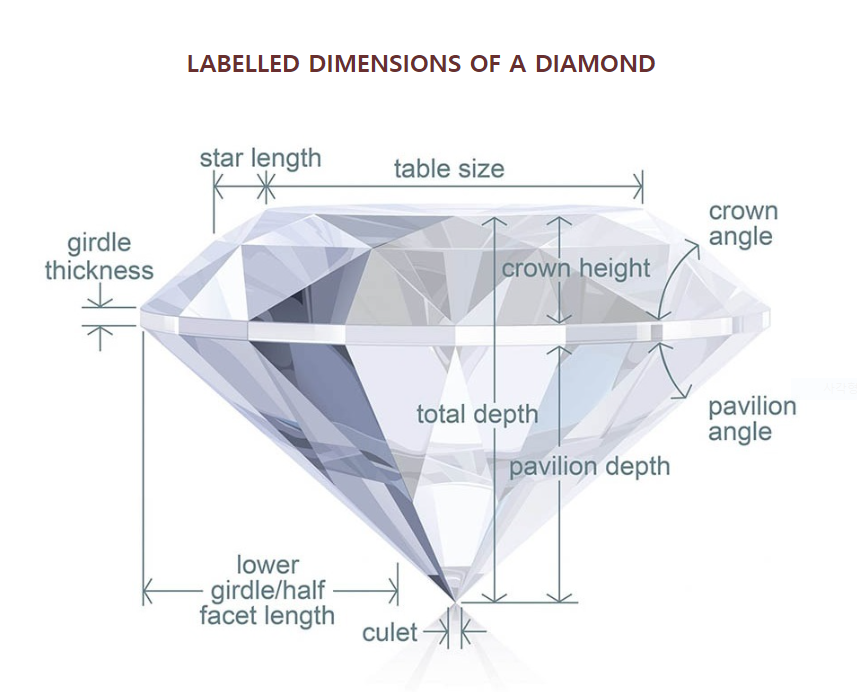

## 데이터 정보(속성 설명)
- 이 클래식 데이터세트에는 거의 54,000개에 달하는 다이아몬드의 가격과 기타 속성이 포함되어 있습니다. 대상을 포함하여 데이터세트에는 10개의 속성이 포함되어 있습니다. 가격.

  - carat(캐럿)(0.2-5.01): 캐럿은 미터법 캐럿으로 측정된 다이아몬드의 물리적 중량입니다. 1캐럿은 0.20그램에 해당하며 100포인트로 세분화됩니다.
  - cut(컷)(Fair-보통, Good-좋음, Very Good-매우 좋음, Premium-프리미엄, Ideal-이상적): 컷의 품질입니다. 다이아몬드는 정밀하게 커팅될수록 눈에 더욱 매혹적인 다이아몬드가 되어 고급 등급이 됩니다.
  - color(색상)(J(최악)부터 D(최고)까지): 보석 품질의 다이아몬드 색상은 다양한 색상으로 나타납니다. 무색에서 연한 노란색 또는 연한 갈색까지의 범위입니다. 무색 다이아몬드는 가장 희귀합니다. 다른 자연 색상(예: 파란색, 빨간색, 분홍색)은 "팬시"라고 알려져 있으며 색상 등급은 흰색 무색 다이아몬드와 다릅니다.
  - clarity(선명도)(I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최고)): 다이아몬드는 내포물로 알려진 내부 특성이나 흠집으로 알려진 외부 특성을 가질 수 있습니다. 내포물이나 흠집이 없는 다이아몬드는 드뭅니다. 그러나 대부분의 특성은 확대해야만 볼 수 있습니다.
  - depth(깊이)(43-79): z / 평균(x, y) = 2 * z / (x + y)와 동일한 전체 깊이 백분율입니다. 다이아몬드의 깊이는 위에 표시된 다이어그램에 언급된 대로 culet(하단 팁)에서 테이블(평평한 상단 표면)까지 측정된 높이(밀리미터)입니다.
  - table(표) (43-95): 가장 넓은 지점에 대한 다이아몬드 상단의 너비입니다. 관찰자가 볼 때 빛을 모든 방향으로 반사하여 다이아몬드에 놀라운 불꽃과 광채를 부여합니다.
  - price(가격)($$326 - $18826): 미국 달러로 표시된 다이아몬드 가격입니다. 이는 데이터 세트의 대상 열입니다.
  - x (0 - 10.74): 다이아몬드의 길이(mm)
  - y(0 - 58.9): 다이아몬드의 폭(mm)
  - z(0 - 31.8): 다이아몬드의 깊이(mm 단위)

## 데이터 분석

### 결측값 및 범주형 변수 확인

In [3]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


- 모든 속성에는 Null이 아닌 값이 53940개 있으므로 누락된 값이 없습니다.
- 범주형데이터 3개(cut, color, clarity) 있고, 나머지는 수치형 데이터 임

In [31]:
print(dia.select_dtypes(include=['int64']).columns)
print(dia.select_dtypes(include=['float64']).columns)
print(dia.select_dtypes(include=['object', 'category']).columns)

Index(['price'], dtype='object')
Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


- int64 : ['price']
- float64 : ['carat', 'depth', 'table', 'x', 'y', 'z']
- category : ['cut', 'color', 'clarity']

In [32]:
num_dia = dia.select_dtypes(include=['int64', 'float64'])
str_dia = dia.select_dtypes(include=['object', 'category'])

### 수치형 데이터 평가

#### 수치형 전체 데이터의 상관관계(pairplot)

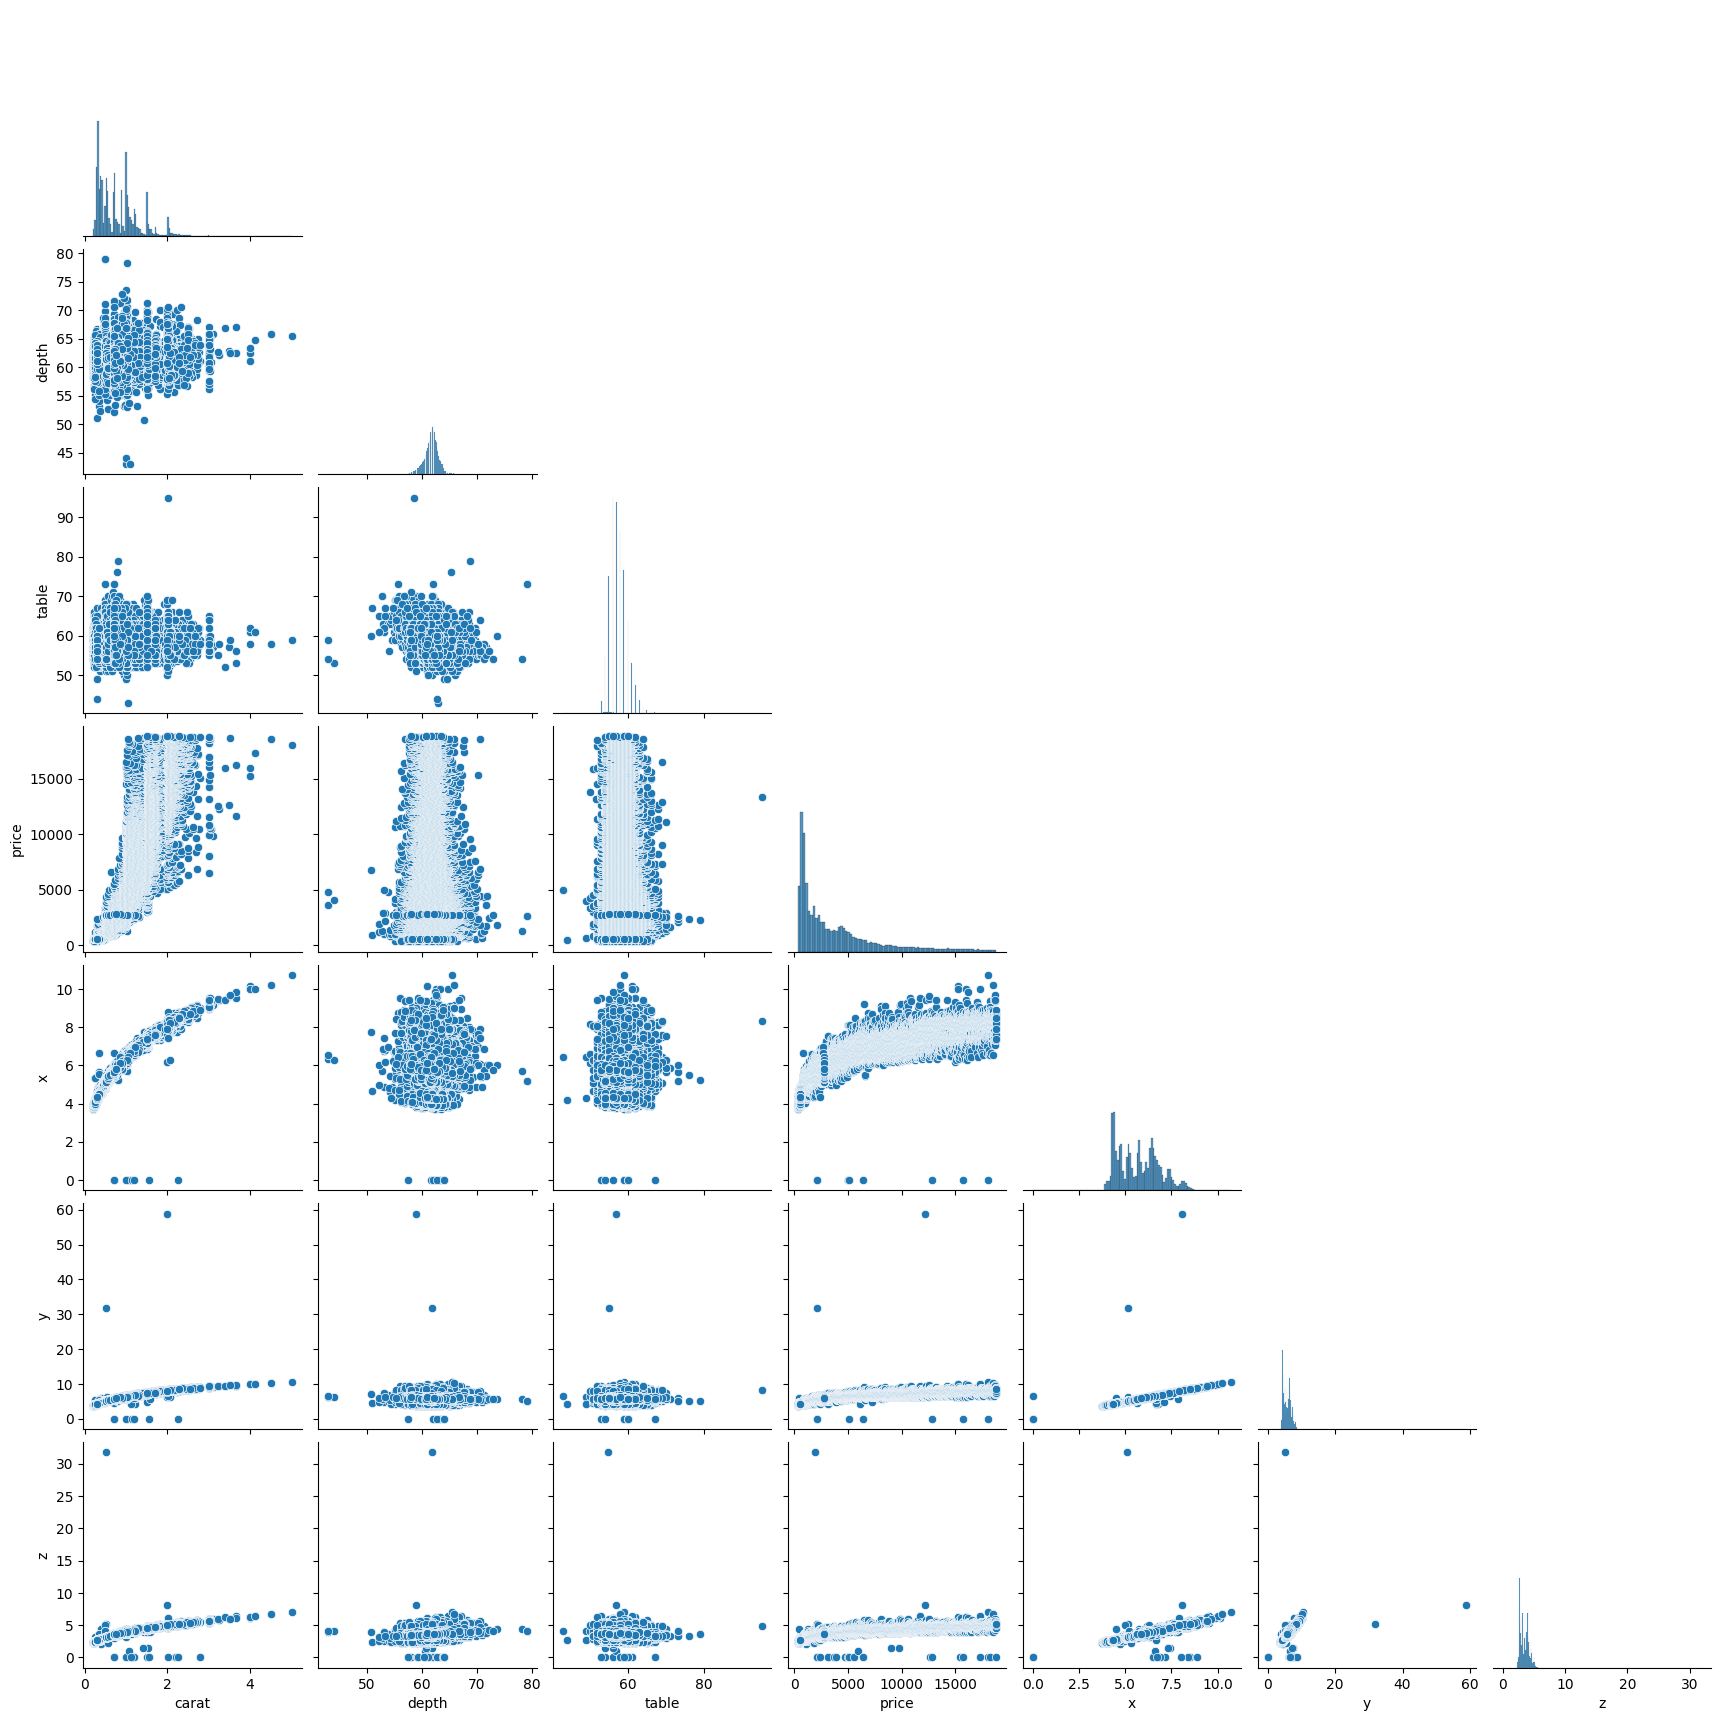

In [34]:
sns.pairplot(num_dia, corner = True)

#### 수치형 전체 데이터의 상관관계(heatmap)

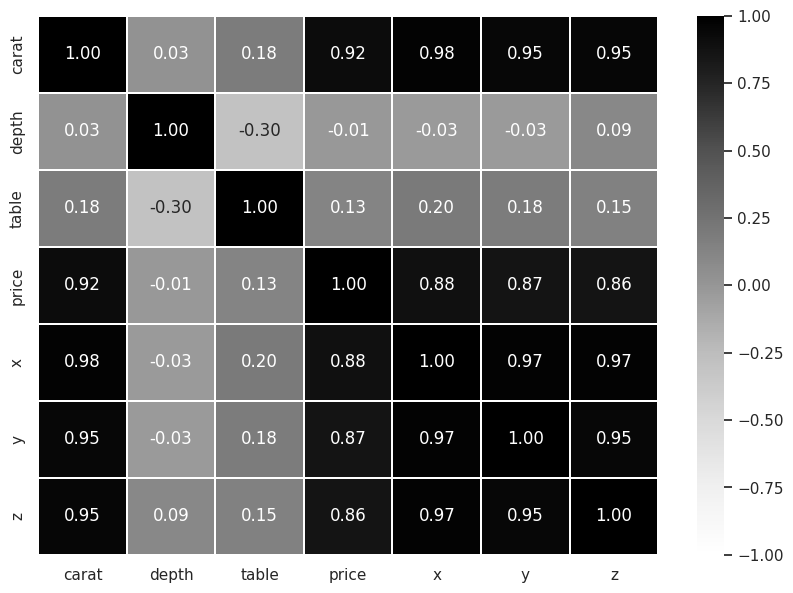

In [48]:
corr = num_dia.corr()                        # 상관행렬표 만들기
sns.heatmap(corr,
            annot = True,                     # 상관계수 표시
            fmt = '.2f',                      # 상관계수 소수점 자리
            cmap = 'Greys',                   # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = -1.0,                         # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기

- "carat", "x", "y", "z" 컬럼은 종속 변수인 price(가격)과 높은 상관관계가 있습니다.

#### price(가격)에 따른 분포

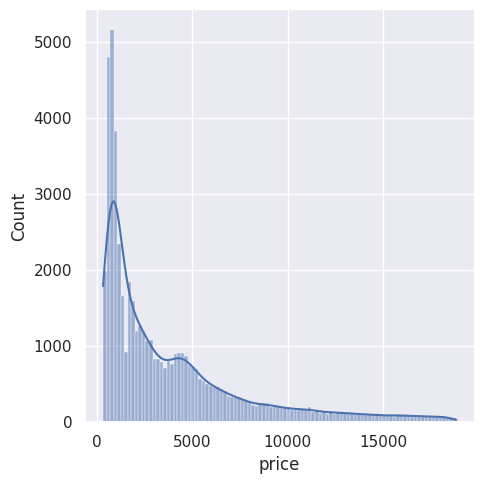

In [55]:
sns.displot(dia, x = 'price', kde='True', bins = 100)

### 범주형 데이터 평가

In [49]:
print(str_dia['cut'].nunique(), 'cut : ', str_dia['cut'].unique())          # ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
print(str_dia['color'].nunique(), 'color : ', str_dia['color'].unique())      # ['E', 'I', 'J', 'H', 'F', 'G', 'D']
print(str_dia['clarity'].nunique(), 'clarity : ', str_dia['clarity'].unique())  # ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

5 cut :  ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
7 color :  ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
8 clarity :  ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


- cut : unique 한 5개 값 ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
- color : unique 한 7개 값 ['E', 'I', 'J', 'H', 'F', 'G', 'D']
- clarity : unique 한 8개 값 ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

<ipython-input-21-a00d38a461a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = dia, x = 'cut', y = 'price', palette = cols)


<Axes: xlabel='cut', ylabel='price'>

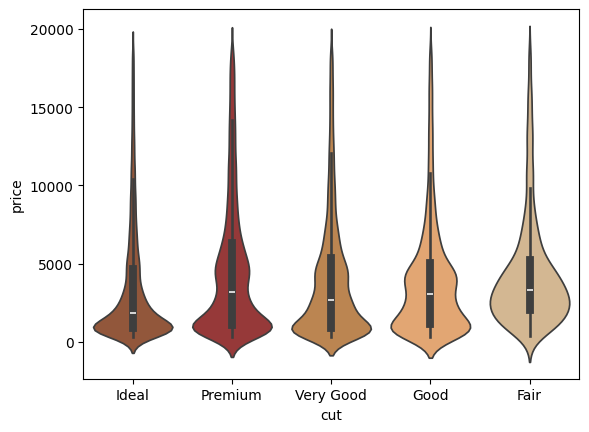

In [21]:
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
sns.violinplot(data = dia, x = 'cut', y = 'price', palette = cols)

- Ideal("이상적인") 다이아몬드 컷이 가장 많고 Fair("보통") 컷이 가장 적습니다.
- 모든 컷의 다이아몬드가 더 낮은 가격 카테고리에 해당하는 가격이 더 많습니다.

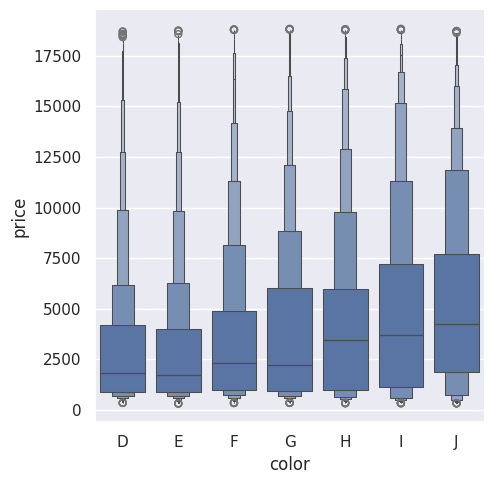

In [50]:
sns.catplot(data = dia.sort_values('color'), x = 'color', y = 'price', kind = 'boxen')

<ipython-input-22-070ea2cf3661>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = dia, x = 'color', y = 'price', palette = cols)
<ipython-input-22-070ea2cf3661>:2: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data = dia, x = 'color', y = 'price', palette = cols)


<Axes: xlabel='color', ylabel='price'>

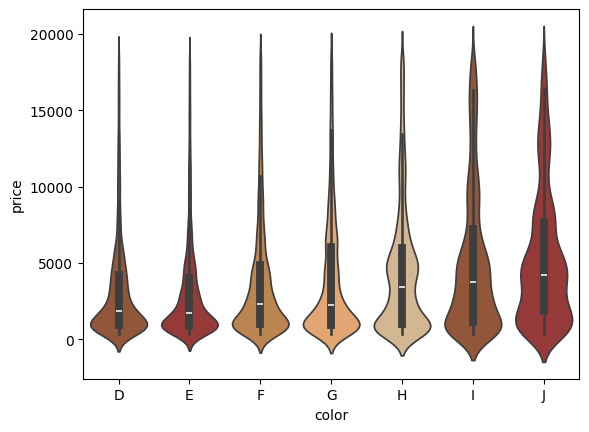

In [22]:
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
sns.violinplot(data = dia, x = 'color', y = 'price', palette = cols)

- 최악의 컬러인 "J" 컬러 다이아몬드가 가장 드물지만, "H"와 "G"도 품질은 떨어지지만 그 수가 더 많습니다.

<ipython-input-23-be1198b8fa82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = dia, x = 'clarity', y = 'price', palette = cols)
<ipython-input-23-be1198b8fa82>:2: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.violinplot(data = dia, x = 'clarity', y = 'price', palette = cols)


<Axes: xlabel='clarity', ylabel='price'>

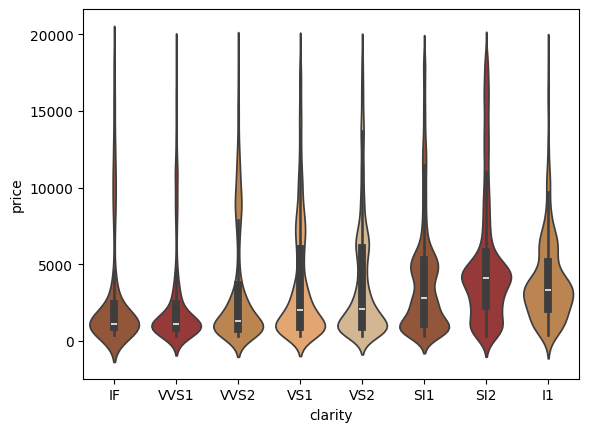

In [23]:
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
sns.violinplot(data = dia, x = 'clarity', y = 'price', palette = cols)

- 가장 좋은 "IF" 선명도와 최악의 "I1" 선명도를 지닌 다이아몬드는 매우 드물며 나머지는 대부분 중간 정도의 선명도를 갖습니다.

### 기술 통계

In [10]:
# 통계적 설명과 데이터 분산의 이해를 위한 일변량 분석 수행
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


- price("가격")은 오른쪽으로 치우쳐 있으며 왼쪽에 더 많은 데이터 포인트가 있습니다.
- 'x', 'y' 및 'z'의 차원 특성에서 - 최소값은 0이므로 이러한 데이터 포인트는 별로 의미가 없는 1D 또는 2D 다이아몬드 개체가 됩니다. 따라서 적절한 값으로 대치되거나 삭제되어야 합니다.

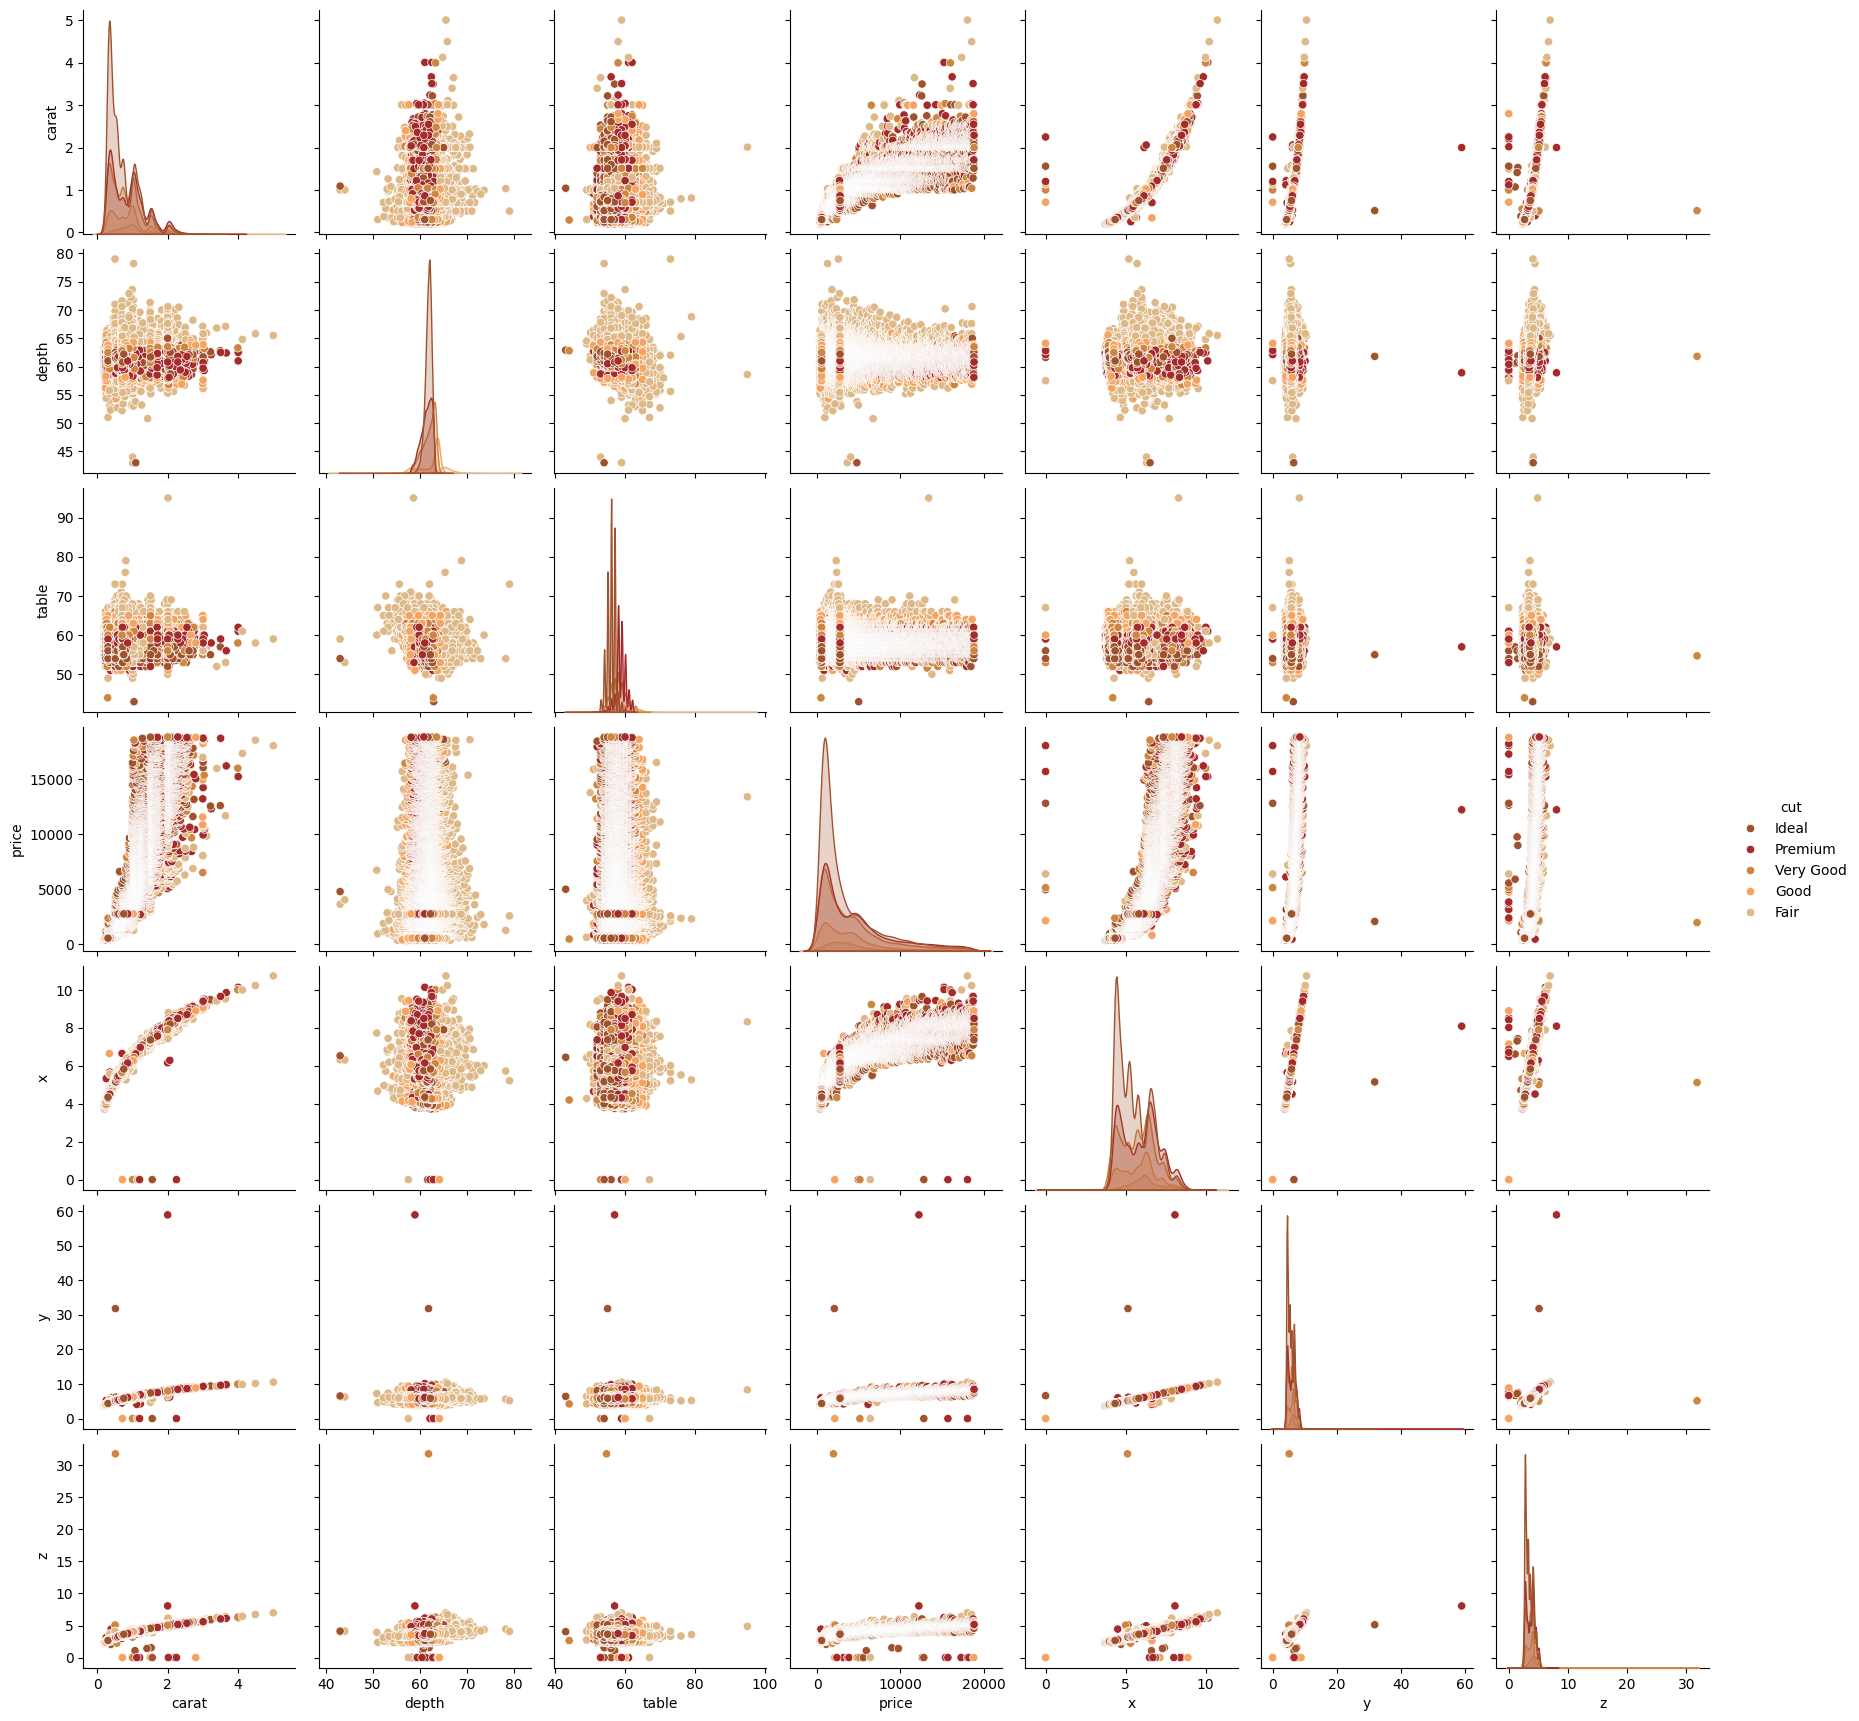

In [11]:
# pairplot 으로 이변량 분석 수행
ax = sns.pairplot(dia, hue= "cut", palette = cols)

### 잠재적 이상값 확인

Text(0.5, 1.0, "Line Plot on Price vs 'x'")

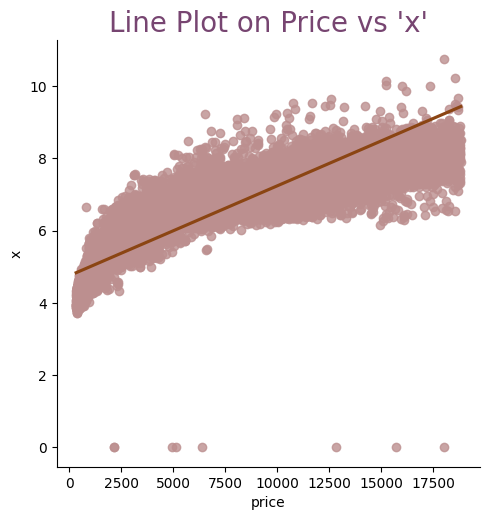

In [30]:
lm = sns.lmplot(x="price", y="x", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'y'")

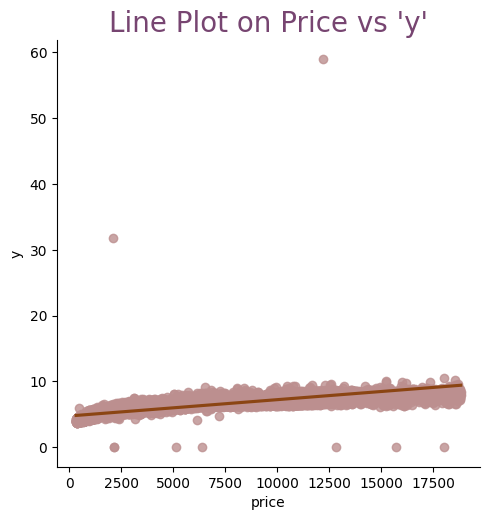

In [25]:
lm = sns.lmplot(x="price", y="y", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'z'")

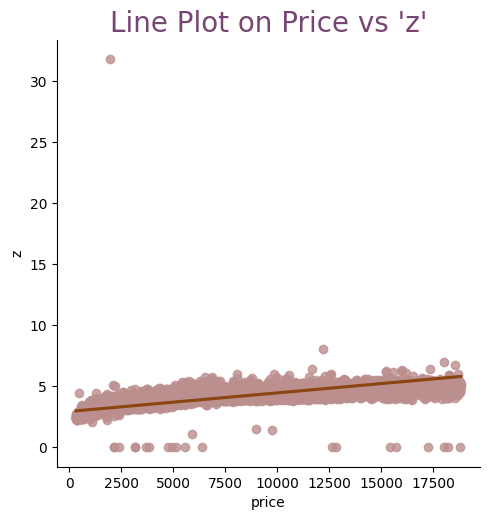

In [27]:
lm = sns.lmplot(x="price", y="z", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'depth'")

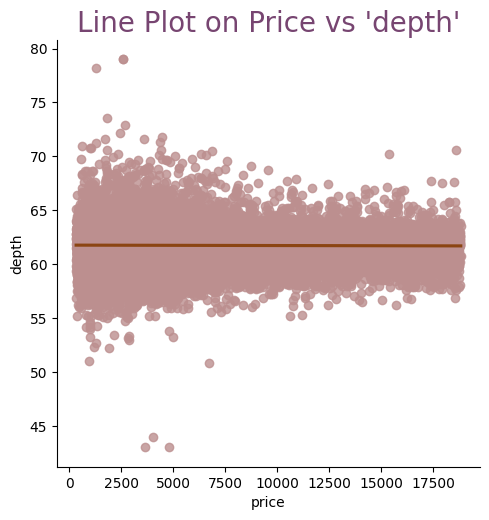

In [28]:
lm = sns.lmplot(x="price", y="depth", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)

Text(0.5, 1.0, "Line Plot on Price vs 'Table'")

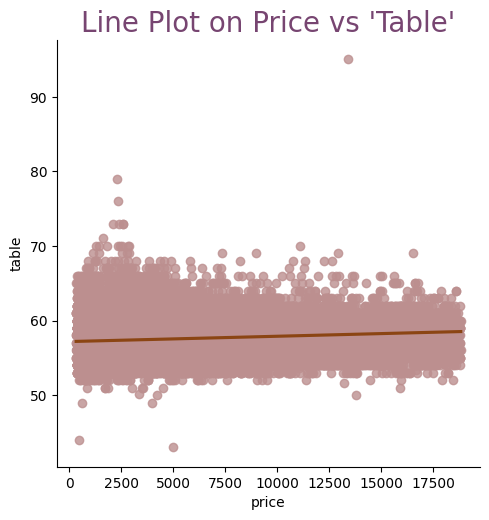

In [29]:
lm = sns.lmplot(x="price", y="table", data=dia, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)

위 기능의 선 그래프에서 우리는 데이터를 알고리즘에 공급하기 전에 삭제할 이상값을 쉽게 찾아낼 수 있습니다.¶